In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn import tree
import gdown
from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Sanchit Dakle\OneDrive\Desktop\Excelar\heart_disease.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [4]:
# Check for missing values
print(data.isnull().sum())

# Check for outliers and inconsistencies
print(data.describe())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [5]:
# Visualize the distribution of features
import matplotlib.pyplot as plt
import seaborn as sns


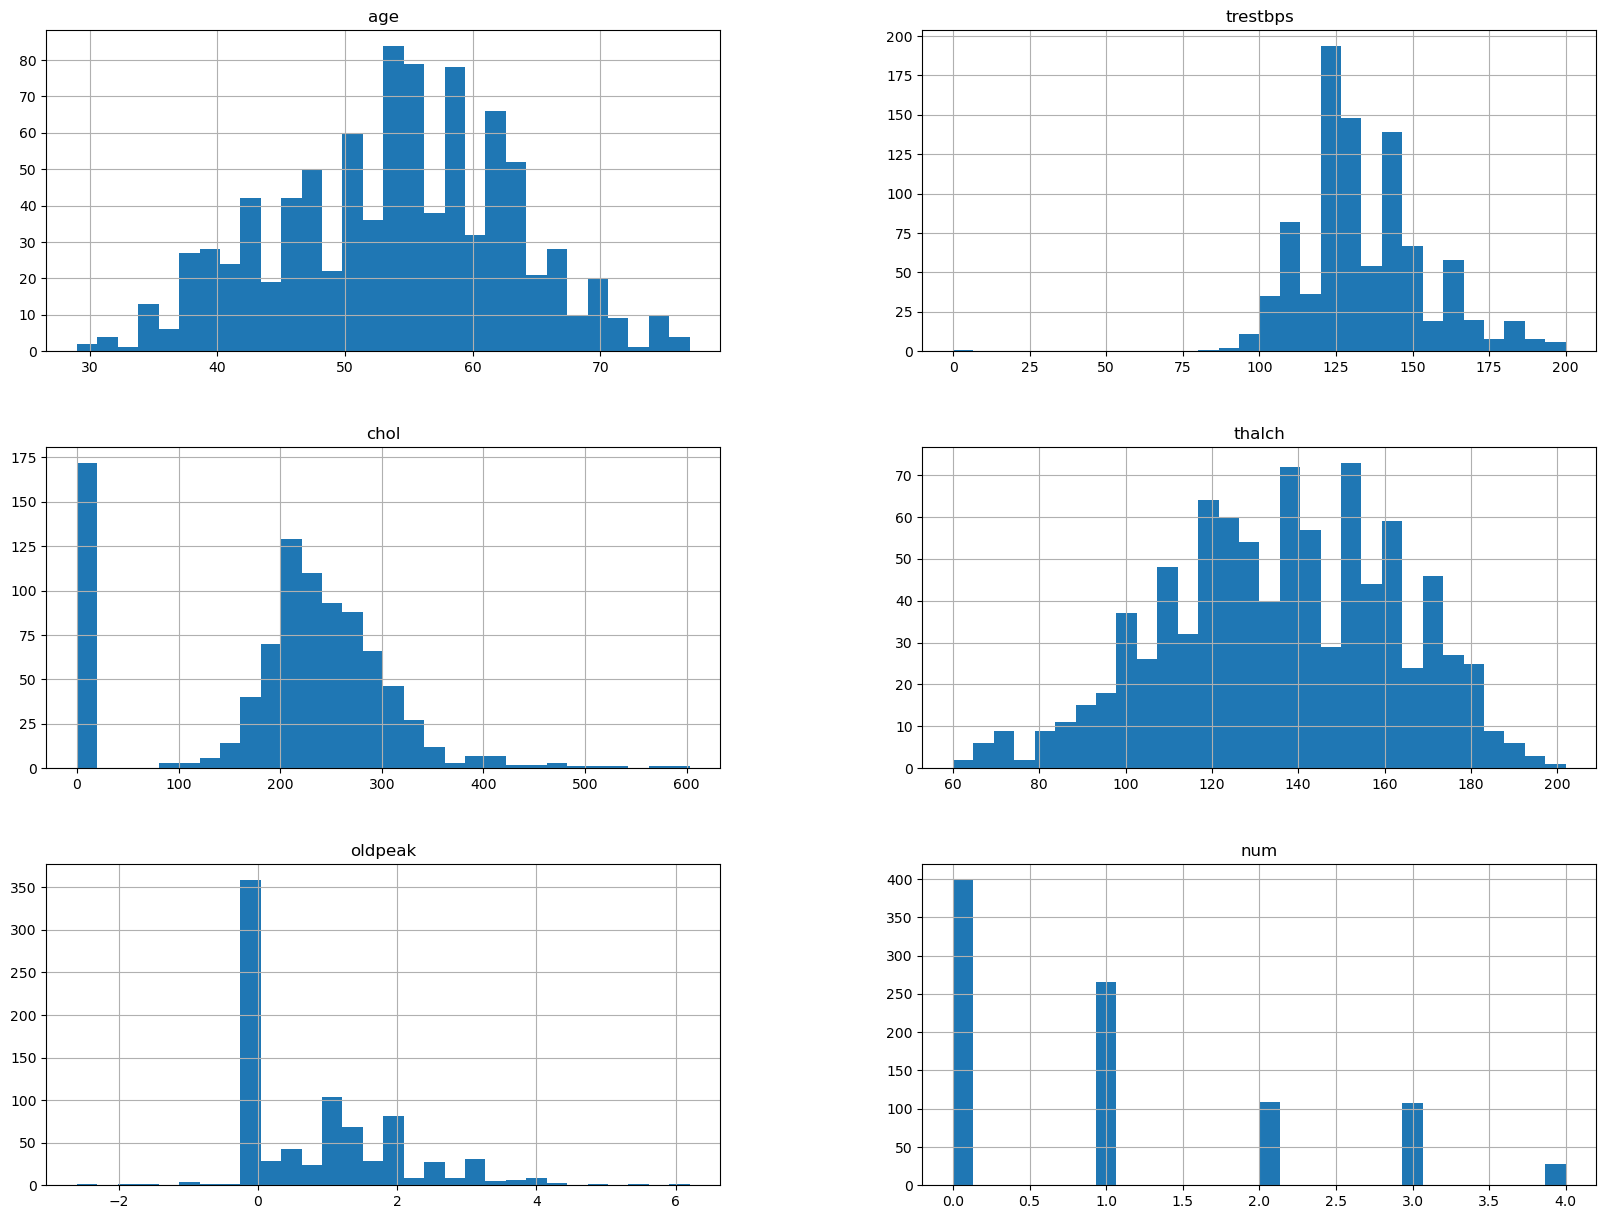

In [6]:
# Histograms
data.hist(bins=30, figsize=(20, 15))
plt.show()


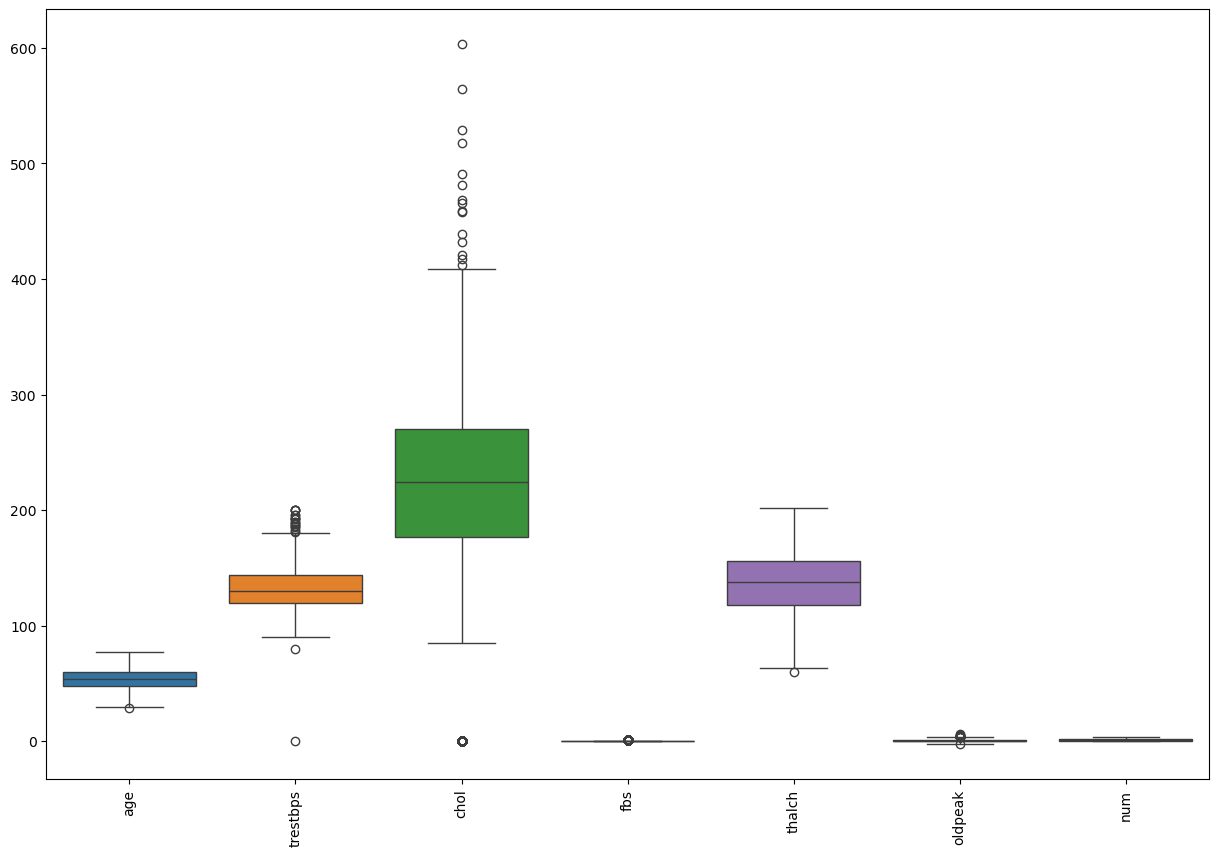

In [7]:
# Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


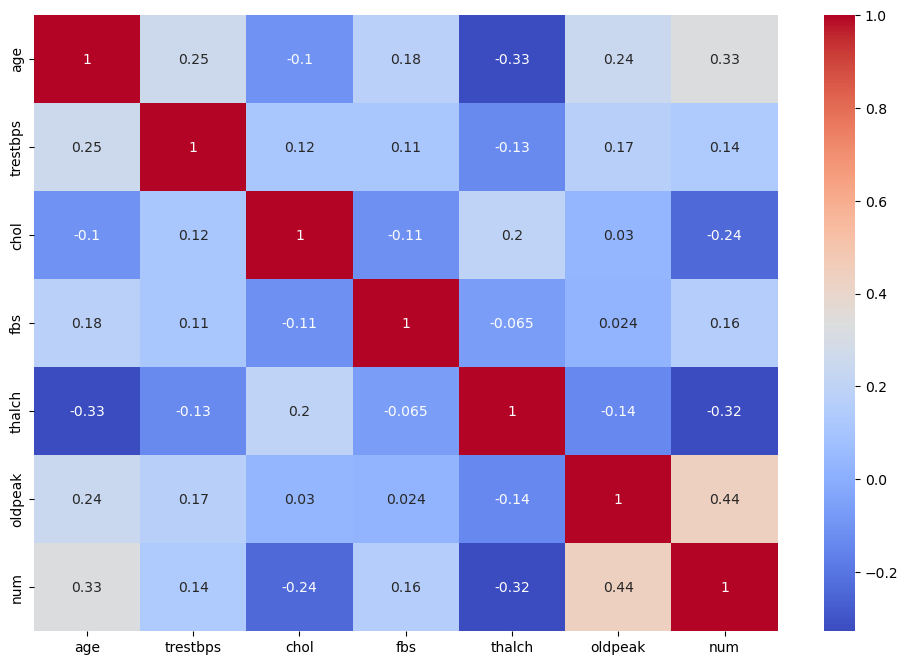

In [8]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()


In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [10]:
# Handle missing values (if any)
data = data.fillna(data.median(numeric_only= True))



In [11]:
# Encoding categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_cols = data.select_dtypes(include=['object']).columns
data_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))
data = data.drop(categorical_cols, axis=1).join(data_encoded)


In [12]:
# Scaling numerical features
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [13]:
data.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'num',
       'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'exang_TRUE',
       'exang_TURE', 'slope_flat', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect'],
      dtype='object')

In [14]:
# Define target and features
X = data.drop('cp_atypical angina', axis=1)
y = data['cp_atypical angina']



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, ConfusionMatrixDisplay


In [16]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression()
lr

LinearRegression()

In [19]:
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
# Train the Decision Tree model
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [21]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree model for regression
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [22]:
# Predict on the test set using the regressor object
y_pred = regressor.predict(X_test)

# Evaluate the regression model (you might need different metrics for regression)
# Example metrics for regression:
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.8868267667729309
R-squared: 0.25714285714285734


In [23]:
from sklearn.tree import DecisionTreeRegressor

# Train the Decision Tree model for regression
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Predict on the test set using the regressor object
y_pred = regressor.predict(X_test)

# Evaluate the regression model (you might need different metrics for regression)
# Example metrics for regression:
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 0.9237778820551367
R-squared: 0.22619047619047616


In [24]:
# Evaluate the regression model using appropriate metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
plt.show()

Mean Squared Error: 0.9237778820551367
R-squared: 0.22619047619047616
Mean Absolute Error: 0.356219828499713


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor  # Use Regressor for continuous target

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] # Criteria for regression
}

# Perform Grid Search using DecisionTreeRegressor
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error') # Use a regression metric
grid_search.fit(X_train, y_train)

# ... (rest of your code remains the same)

C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 137

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_split': [2, 10, 20]},
             scoring='neg_mean_squared_error')

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor # Use Regressor for continuous target

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 10, 20],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] # Criteria for regression
}

# Perform Grid Search using DecisionTreeRegressor
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error') # Use a regression metric
grid_search.fit(X_train, y_train)

# Best parameters
print(f'Best parameters: {grid_search.best_params_}')

# Train the best model
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_train, y_train)

# Predict on the test set with the best model
y_pred_best = best_regressor.predict(X_test)

# Evaluate the best model (you might need different metrics for regression)
# Example metrics for regression:
from sklearn.metrics import mean_squared_error, r2_score
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_best)}')
print(f'R-squared: {r2_score(y_test, y_pred_best)}')

Best parameters: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_split': 20}
Mean Squared Error: 0.6652258387209025
R-squared: 0.442768549143842


C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
75 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sanchit Dakle\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 137

In [27]:
# Train the best model
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict on the test set with the best model
y_pred_best = best_clf.predict(X_test)

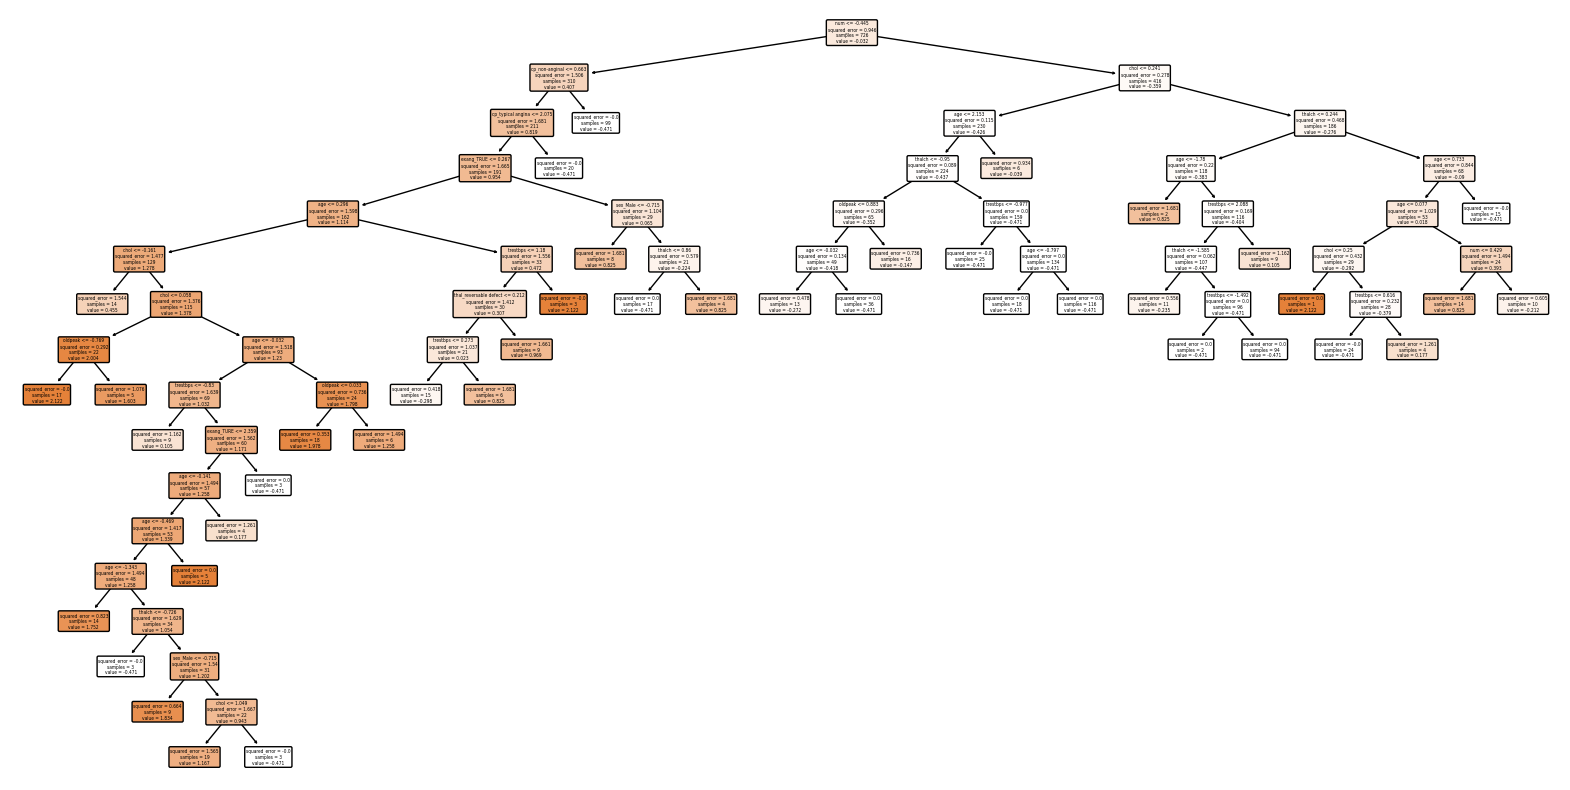

Feature ranking:
1. Feature 8 (0.24808205864018018)
2. Feature 6 (0.24438289001089003)
3. Feature 0 (0.11934686656685703)
4. Feature 9 (0.08134268145163703)
5. Feature 2 (0.08092541062799129)
6. Feature 1 (0.06027591360198333)
7. Feature 12 (0.05974881045521051)
8. Feature 4 (0.03984835686167889)
9. Feature 7 (0.0253102651109183)
10. Feature 13 (0.018831636190013414)
11. Feature 17 (0.01248362850190112)
12. Feature 5 (0.009421481980738985)
13. Feature 14 (0.0)
14. Feature 11 (0.0)
15. Feature 10 (0.0)
16. Feature 16 (0.0)
17. Feature 15 (0.0)
18. Feature 3 (0.0)


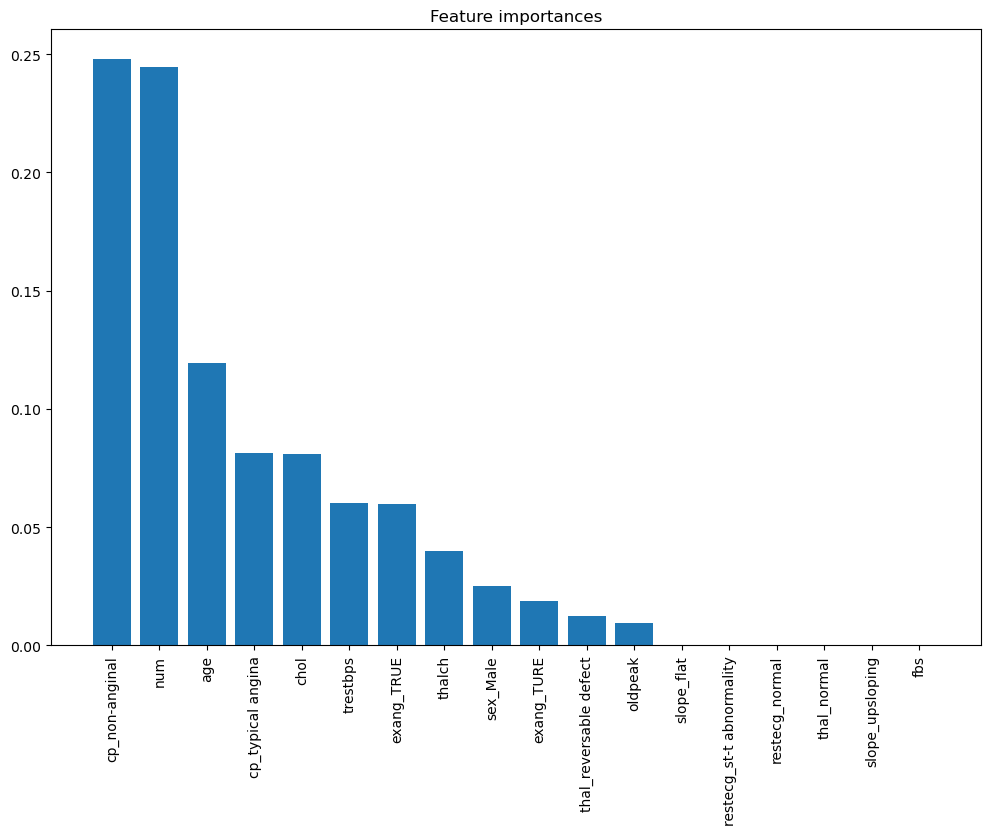

In [28]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], rounded=True)
plt.show()

# Important features
importances = best_clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()
